# Start doing multiple columns

In [1]:
import pandas as pd 
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

# Code for generation of bedrock and soil - height changed

In [2]:
import numpy as np
from scipy.stats import qmc

def generate_data(num_models, Vs_soil_range=(np.log10(100),np.log10(360)), Vs_bedrock_range=(np.log10(760), np.log10(1500)), n_Vs = 1000, h_range=(1, 29)):

    models = []  # Initialize arrays list

    sampler = qmc.LatinHypercube(d=3) # Create a Latin Hypercube Sampler with 3 dimensions

    lower_bound = [Vs_soil_range[0], Vs_bedrock_range[0], h_range[0]] # Lower bound for the sampler
    upper_bound = [Vs_soil_range[1], Vs_bedrock_range[1], h_range[1]] # Upper bound for the sampler

    scaled_samples = qmc.scale(sampler.random(n_Vs), lower_bound, upper_bound) # Generate n_Vs samples

    for i in range(num_models): # Loop over the number of models
        Vs_s, Vs_b, h_soil = scaled_samples[i]
        # Un log the Vs values
        Vs_s = 10**Vs_s
        Vs_b = 10**Vs_b
        h_soil = int(h_soil)
        # Creation of the array
        soil_array = np.full(h_soil, Vs_s) # Generate an array of Vs_s values
        bedrock_array = np.array([Vs_b]) # Generate an array of Vs_b values
        array = np.concatenate([soil_array, bedrock_array]) # Concatenate the two arrays
        models.append(array) # Append the array to the list

    return models

# Example usage
A = generate_data(1000)

# Mean height of the soil layer
avg_len = 0
for a in A:
    avg_len += len(a)
avg_len /= len(A)
print(avg_len, avg_len*5)

15.503 77.515


In [3]:
Vs_soil = []
Vs_bedrock = []
h = []
for a in A:
    Vs_soil.append(np.mean(a[:-1]))
    Vs_bedrock.append(a[-1])
    h.append(len(a)-1)


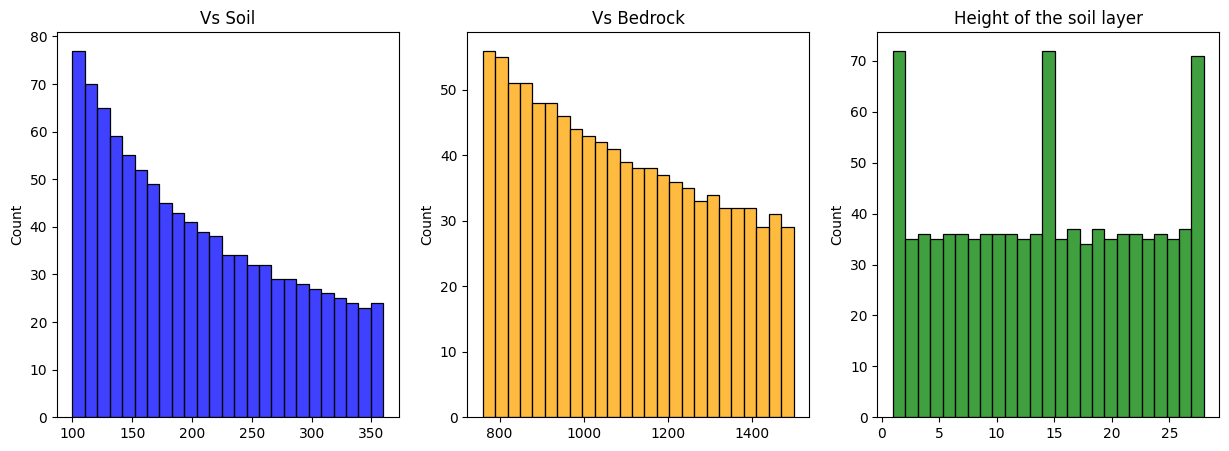

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0] = sns.histplot(Vs_soil, ax=ax[0], bins=25, color='blue')
ax[0].set_title('Vs Soil')
ax[1] = sns.histplot(Vs_bedrock, ax=ax[1], bins=25, color='orange')
ax[1].set_title('Vs Bedrock')
ax[2] = sns.histplot(h, ax=ax[2], bins=25, color='green')
ax[2].set_title('Height of the soil layer')
plt.show()

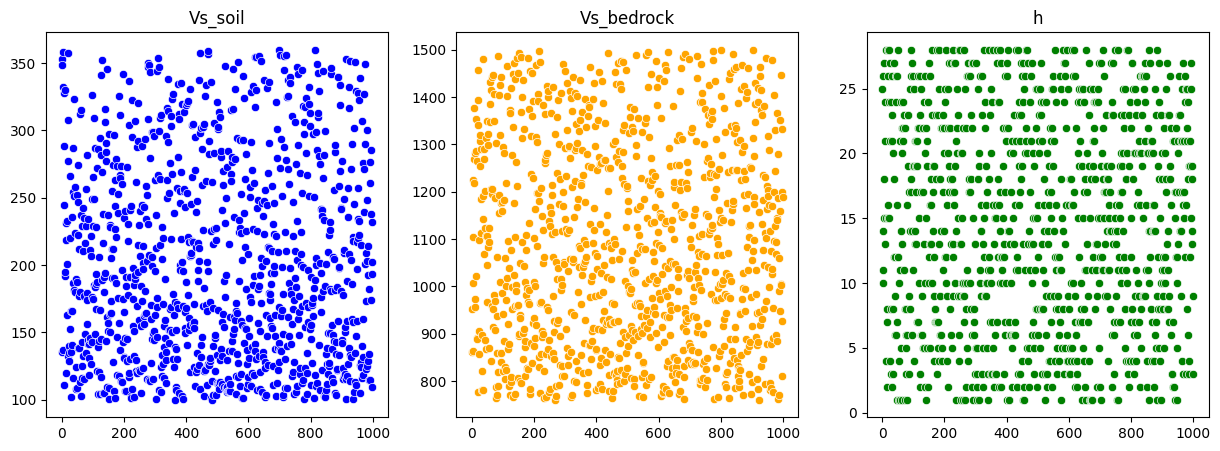

In [234]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))
ax[0] = sns.scatterplot(x=range(len(Vs_soil)), y=Vs_soil, ax=ax[0], color='blue')
ax[0].set_title('Vs_soil')
ax[1] = sns.scatterplot(x=range(len(Vs_bedrock)), y=Vs_bedrock, ax=ax[1], color='orange')
ax[1].set_title('Vs_bedrock')
ax[2] = sns.scatterplot(x=range(len(h)), y=h, ax=ax[2], color='green')
ax[2].set_title('h')
plt.show()

# Save results

In [235]:
# Find the maximum length of the arrays
max_len = max(len(a) for a in A)

# Pad arrays with NaN to make them the same length
padded_arrays = [np.pad(a, (0, max_len - len(a)), constant_values=np.nan) for a in A]

# Create a DataFrame from the padded arrays
df = pd.DataFrame(padded_arrays)

# Save the DataFrame to a CSV file
df.to_csv(r'model_arrays_HLC.csv', index=False)

print("Data saved to Vs_arrays.csv")

Data saved to Vs_arrays.csv


In [141]:
# Save model arrays to a CSV file
#df = pd.read_csv(r"..\1D Soil_Bedrock\model_arrays.csv")
#df.to_csv('model_arrays.csv', index=False)